In [5]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

In [6]:
# 2. Initialize the Taxi environment
RENDER_RGB = 'rgb_array'
RENDER_ANSI = 'ansi'

GAME_TAXI = 'Taxi-v3'

In [7]:
def create_env(pGame=GAME_TAXI, pRenderMode=RENDER_RGB, pPrint=False):
    if pPrint:
        print('[create_env] Creating environment...')
    try:
        env = gym.make(pGame, render_mode=pRenderMode)
        if pPrint:
            print('[create_env] Environment created successfully!')
        return env
    except Exception as e:
        print('[create_env] Error creating environment:', e)


In [10]:
# 3. Create a function to choose a random action
def get_policy( pState, pEnv=create_env()):
    return pEnv.action_space.sample()  # Random action for demonstration

In [11]:
# 4. Set up parameters
episodes = 1  # Number of episodes to run the agent
max_steps = 20  # Maximum steps per episode

In [106]:
## only used for rgb (graphical) rendering
def display_rgb(pEnv=create_env(), pPrintMultipleFrames=False):
    if pEnv.render_mode == RENDER_RGB:
        # Capture the frame for rendering
        frame = env.render()
        
        # Display the frame in Jupyter
        plt.imshow(frame)
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)  # Clears the output for each frame
        time.sleep(0.3)  # Adjust for slower or faster playback
        


In [121]:
def decode_state(pState, pPrint=False):
    # Constants
    num_taxi_locations = 5 * 5  # 25 (5 rows x 5 cols)
    num_passenger_locations = 5  # 5 locations
    num_destinations = 4          # 4 destinations

    # Calculate taxi position
    taxi_state = pState // (num_passenger_locations * num_destinations)
    passenger_state = (pState // num_destinations) % num_passenger_locations
    destination_state = pState % num_destinations

    # Calculate row and column from state
    taxi_row = taxi_state // 5
    taxi_col = taxi_state % 5

    passenger_row = passenger_state // 5
    passenger_col = passenger_state % 5

    # For simplicity, we'll map destinations directly to their grid positions:
    # R: (0, 0), G: (0, 4), Y: (4, 0), B: (4, 3)
    dest_positions = {0: (0, 0), 1: (0, 4), 2: (4, 0), 3: (4, 3)}
    destination_position = dest_positions.get(destination_state, 'Unknown')

    taxi_pos = (taxi_row, taxi_col)
    passenger_pos = (passenger_row, passenger_col)
    dest_pos = destination_position
    
    if pPrint:
        # Print the positions
        print(f"Taxi Position: {taxi_pos}")
        print(f"Passenger Position: {passenger_pos}")
        print(f"Destination Position: {dest_pos}")
    
    #return (taxi_row, taxi_col), (passenger_row, passenger_col), destination_position
    return taxi_pos, passenger_pos, destination_position



In [122]:
# 5. Run the agent in the Taxi environment
def run_episodes(pEnv = create_env()
                 , pEpisodes = episodes
                 , pMaxSteps=max_steps
                 , pPrint=False
                 , pPrintMultipleFrames=False
                ):
    for episode in range(pEpisodes):
        state, info = pEnv.reset()  # Reset the environment for each episode
        done = False
        step = 0
        
        while not done and step < pMaxSteps:
            
            if pEnv.render_mode == RENDER_RGB:
                display_rgb(pPrintMultipleFrames=pPrintMultipleFrames)
            else:
                print(pEnv.render())
            
            ## PRINT before action
            if pPrint:   
                print('---------------')
                print('BEFORE action')
                decode_state(pState=state,  pPrint=True)

            # Choose an action using the function
            action = get_policy(pState=state, pEnv=pEnv)
            
            # Apply the action to the environment
            next_state, reward, terminated, truncated, info = pEnv.step(action)

            ## PRINT after action
            if pPrint:                
                print(f'current step: {step}')
                print(f'current state: {state}')                
                print(f'reward: {reward}')
                print(f'action: {action}')
                print(f'next_state: {next_state}')
                print(f'info: {info}')    

            
            # Update state and check termination
            state = next_state

            ## Cell positions
            if pPrint:   
                print('AFTER action')
                decode_state(pState=state, pPrint=True)
           
            done = terminated or truncated
            step += 1
    
        print(f"Episode {episode + 1} finished in {step} steps.\n")
   
    
    # 6. Close the environment when done
    pEnv.close()

---------------
BEFORE action
Taxi Position: (4, 1)
Passenger Position: (0, 2)
Destination Position: (0, 0)
current step: 2
current state: 428
reward: -1
action: 1
next_state: 328
info: {'prob': 1.0, 'action_mask': array([1, 1, 1, 0, 0, 0], dtype=int8)}
AFTER action
Taxi Position: (3, 1)
Passenger Position: (0, 2)
Destination Position: (0, 0)
Episode 1 finished in 3 steps.



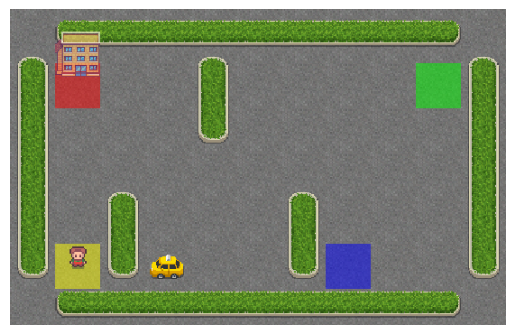

In [123]:
## RGB
env = create_env(pRenderMode = RENDER_RGB,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=3, pPrint=True, pPrintMultipleFrames=True)

In [80]:
## text
env = create_env(pRenderMode = RENDER_ANSI,  pPrint=True)

[create_env] Creating environment...
[create_env] Environment created successfully!


In [91]:
env.action_space

Discrete(6)

In [92]:
env.observation_space

Discrete(500)

In [125]:
## text
env = create_env(pRenderMode = RENDER_ANSI,  pPrint=True)
run_episodes(pEnv=env, pEpisodes=1, pMaxSteps=2, pPrint=True)

[create_env] Creating environment...
[create_env] Environment created successfully!
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


---------------
BEFORE action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
current step: 0
current state: 382
reward: -10
action: 4
next_state: 382
info: {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
AFTER action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

---------------
BEFORE action
Taxi Position: (3, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
current step: 1
current state: 382
reward: -1
action: 1
next_state: 282
info: {'prob': 1.0, 'action_mask': array([1, 1, 0, 1, 0, 0], dtype=int8)}
AFTER action
Taxi Position: (2, 4)
Passenger Position: (0, 0)
Destination Position: (4, 0)
Episode 1 finished in 2 steps.

